<a href="https://colab.research.google.com/github/YuliaLoburets/ML_learning/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls drive/MyDrive/ML/medical-charges.csv

drive/MyDrive/ML/medical-charges.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


medical_df = pd.read_csv('drive/MyDrive/ML/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
X_name = 'age'
y_name = 'charges'

In [ ]:
def theta_calc(X,y):
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return theta

In [ ]:
X=non_smoker_df[['age']].to_numpy()
y=non_smoker_df[['charges']].to_numpy()

In [ ]:
X_intercept = np.c_[np.ones((X.shape[0],1)), X]

In [ ]:
MNK_coefs = theta_calc(X_intercept, y)
print(MNK_coefs)

[[-2091.42055657]
 [  267.24891283]]


In [ ]:
predictions_MNK = np.dot(X_intercept, MNK_coefs)

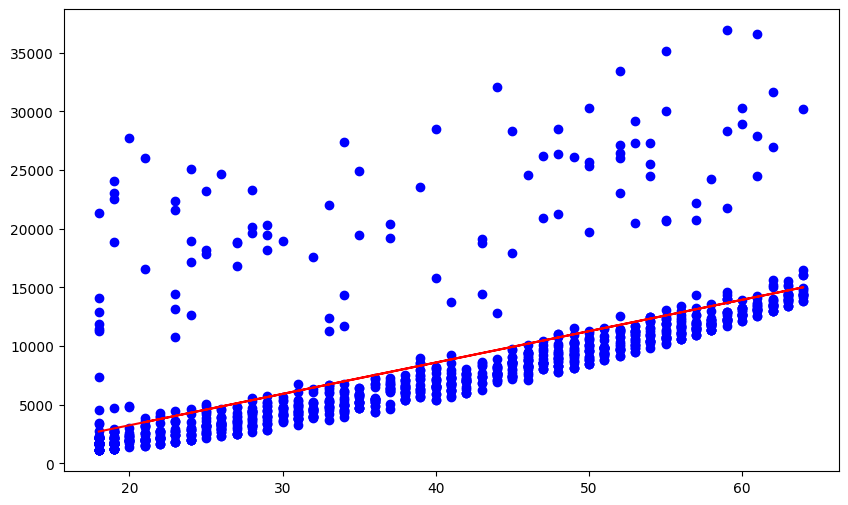

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X,y, color='blue')
plt.plot(X,predictions_MNK, color='red')
plt.show()

In [ ]:
def rmse_calc(target_value, independent_value, w, b):
  actual = target_value
  predicted = independent_value*w + b
  rmse = np.sqrt(np.mean(np.square(predicted-actual)))
  return rmse.round(2)

In [ ]:
r2 = r2_score(y, predictions_MNK)
mae = mean_absolute_error(y, predictions_MNK)
rmse = rmse_calc(non_smoker_df['charges'], non_smoker_df['age'], MNK_coefs[1,0], MNK_coefs[0,0] )
print(f'RMSE for MNK: {rmse}')
print(f"R² score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

RMSE for MNK: 4662.51
R² score: 0.39
Mean Absolute Error: 2580.52


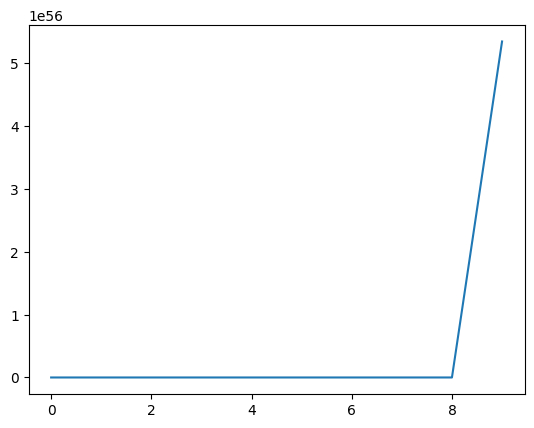

(-5.907281850502707e+27, -1.3300591803737623e+26)

In [ ]:
def full_batch_gradient_descent(X_param, y_param, lr, epochs):
    m, b = 0,0  # Початкові параметри
    n = len(y_param)
    errors = []
    for _ in range(epochs):
        y_pred = m * X_param[:, 0] + b
        error = y_pred - y[:,0]
        # print(sum(error**2))
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X_param[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X_param=X, y_param=y, lr=0.1, epochs=10)
predictions_fbgd = m * X[:, 0] + b

plt.plot(range(10), errors)
plt.show()
m, b

**Спостереження**:
Градієнтний спуск не зійшовся, тому що дані не нормалізовані. Спробуємо нормалізувати дані

In [ ]:
x_min, x_max = np.min(X), np.max(X)
y_min, y_max = np.min(y), np.max(y)
X_normalized = (X - x_min) / (x_max - x_min)
y_normalized = (y - y_min) / (y_max - y_min)

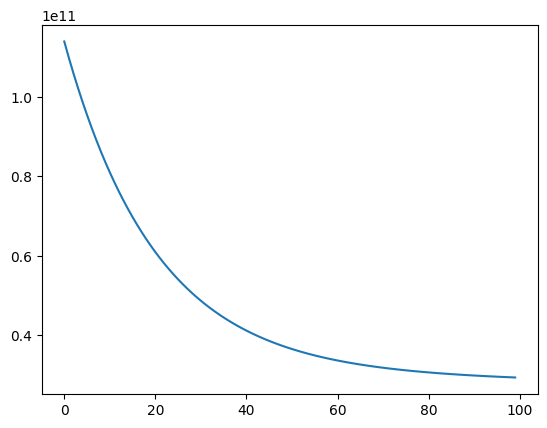

(4509.542150501822, 5903.200581467391)

In [ ]:
m_2, b_2, errors_2 = full_batch_gradient_descent(X_param=X_normalized, y_param=y_normalized, lr=0.01, epochs=100)
predictions_fbgd_2 = m_2 * X_normalized[:, 0] + b_2
plt.plot(range(100), errors_2)
plt.show()

m_2, b_2

In [ ]:
rmse = np.sqrt(mean_squared_error(y, predictions_fbgd_2))
r2 = r2_score(y, predictions_fbgd_2)
mae = mean_absolute_error(y, predictions_fbgd_2)
print(f'RMSE for full-batch gradient descent with 0.01 learning rate: {rmse:.2f}')
print(f"R² score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

RMSE for full-batch gradient descent with 0.01 learning rate: 5253.74
R² score: 0.23
Mean Absolute Error: 3424.47


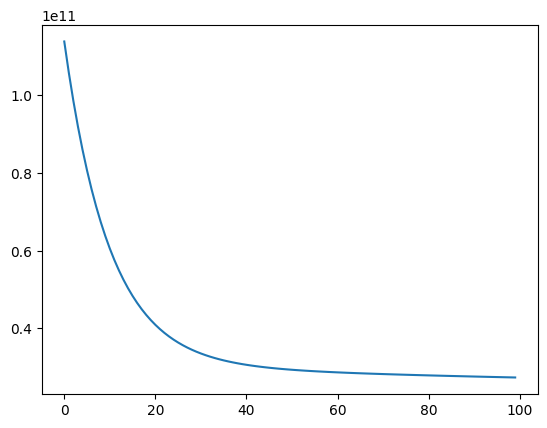

(5837.769531434262, 5910.371264914907)

In [ ]:
m_3, b_3, errors_3 = full_batch_gradient_descent(X_param=X_normalized, y_param=y_normalized, lr=0.02, epochs=100)
predictions_fbgd_3 = m_3 * X_normalized[:, 0] + b_3

plt.plot(range(100), errors_3)
plt.show()

m_3, b_3

In [ ]:
rmse = np.sqrt(mean_squared_error(y, predictions_fbgd_3))
r2 = r2_score(y, predictions_fbgd_3)
mae = mean_absolute_error(y, predictions_fbgd_3)
print(f'RMSE for full-batch gradient descent with 0.02 learning rate: {rmse:.2f}')
print(f"R² score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

RMSE for full-batch gradient descent with 0.02 learning rate: 5067.33
R² score: 0.28
Mean Absolute Error: 3325.46


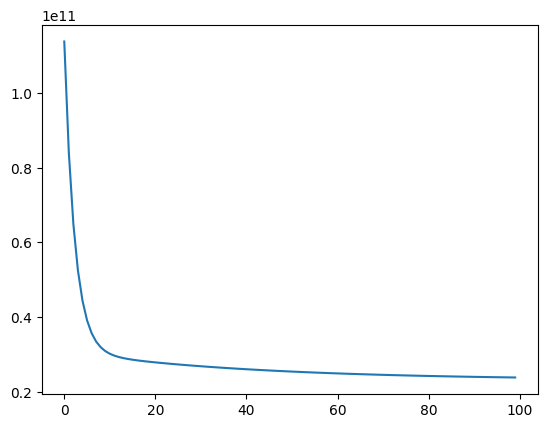

(9723.917946100513, 4011.741051346748)

In [ ]:
m_4, b_4, errors_4 = full_batch_gradient_descent(X_param=X_normalized, y_param=y_normalized, lr=0.08, epochs=100)
predictions_fbgd_4 = m_4 * X_normalized[:, 0] + b_4

plt.plot(range(100), errors_4)
plt.show()

m_4, b_4

In [ ]:
rmse = np.sqrt(mean_squared_error(y, predictions_fbgd_4))
r2 = r2_score(y, predictions_fbgd_4)
mae = mean_absolute_error(y, predictions_fbgd_4)
print(f'RMSE for full-batch gradient descent with 0.08 learning rate: {rmse:.2f}')
print(f"R² score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

RMSE for full-batch gradient descent with 0.08 learning rate: 4729.36
R² score: 0.38
Mean Absolute Error: 2751.74


In [ ]:
from sklearn.linear_model import LinearRegression
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([[267.24891283]]), array([-2091.42055657]))

In [ ]:
predictions_sklearn = lin_reg.predict(X)

In [ ]:
r2 = r2_score(y, predictions_sklearn)
rmse = np.sqrt(mean_squared_error(y, predictions_sklearn))
mae = mean_absolute_error(y, predictions_sklearn)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Root Mean Squared Error: 4662.51
R² score: 0.39
Mean Absolute Error: 2580.52


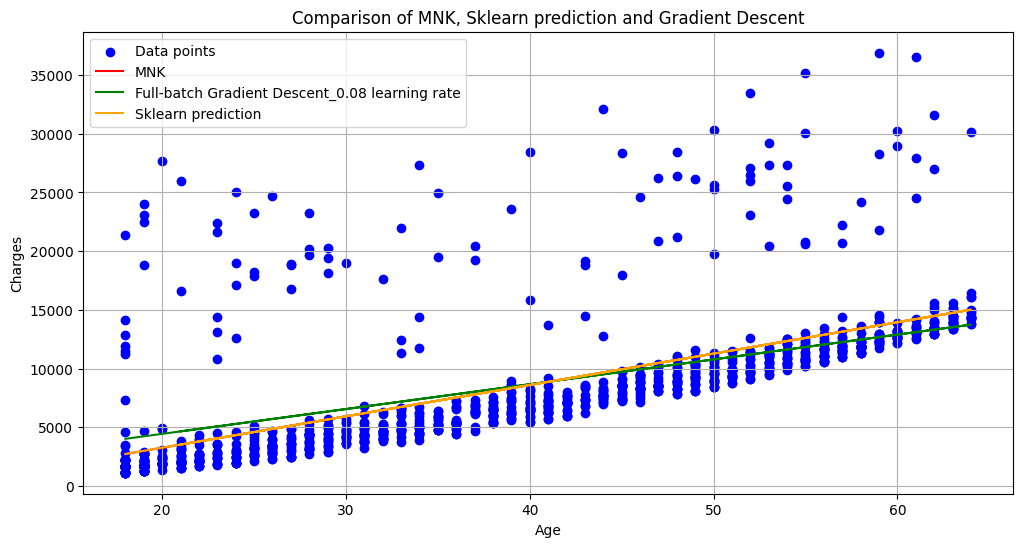

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd_4, color='green', label='Full-batch Gradient Descent_0.08 learning rate')
plt.plot(X[:, 0], predictions_sklearn, color='orange', label='Sklearn prediction')
plt.title('Comparison of MNK, Sklearn prediction and Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

**Спостереження**:

1. Згідно графіку бачимо, що модель прогнозування через Sklearn і модель,  розрахована вручну методом найменших квадратів, співпали. Значення коефіцієнтів ідентичні.

2. Модель на основі градієнтого спуску при learning rate 0.08 показала кращі результати та вищий коефіцієнт R2 і менші коефіцієнти RMSE та MAE у порівнянні з іншими learning rates.

2. Порівнюючи коефіцієнти моделів, які побудовані на основі методу найменших квадратів та моделі на основі градієнтного спуску при learning rate 0.08, можна зробити висновок, що вони показали дуже схожі результати і суттєво не відрізняються по коефіцієнтам моделі. Але МНК все-таки показав трохи кращі результати у порівнянні з градієнтним спуском.



 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [ ]:
X_param = smoker_df['age'].to_frame()
y_param = smoker_df['charges'].to_frame()

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_param, y_param)

LinearRegression()

In [ ]:
linear_reg.coef_, linear_reg.intercept_

(array([[305.23760211]]), array([20294.12812692]))

In [ ]:
predictions_smokers = linear_reg.predict(X_param)

In [ ]:
r2 = r2_score(y_param, predictions_smokers)
rmse = np.sqrt(mean_squared_error(y_param,predictions_smokers))
mae = mean_absolute_error(y_param, predictions_smokers)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Root Mean Squared Error: 10711.00
R² score: 0.14
Mean Absolute Error: 10097.80


In [ ]:
smoker_df.charges.describe()

,charges
count,274.000000
mean,32050.231832
std,11541.547176
min,12829.455100
25%,20826.244213
50%,34456.348450
75%,41019.207275
max,63770.428010


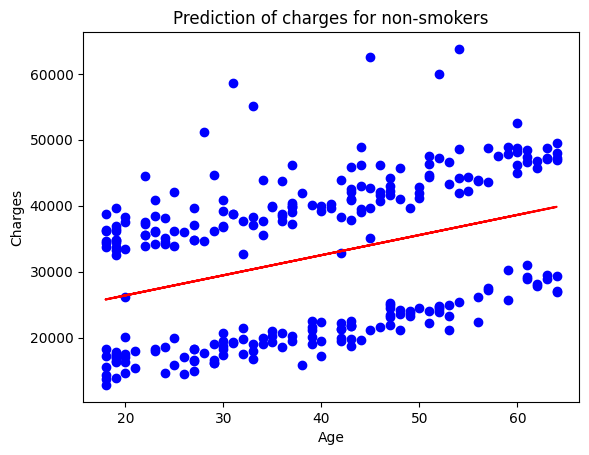

In [ ]:
plt.scatter(X_param, y_param, color='blue')
plt.plot(X_param, predictions_smokers, color='red')
plt.title('Prediction of charges for non-smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

**Висновок**:

1. Точність даної моделі R2 не досить висока і становить 0.14.

2. Також досить високі показники RMSE та MAE.

3. Згідно графіку бачимо чітко дві групи точок, потрібно ще дослідити дані, щоб виявити, що саме впливає на таке розділення точок і згодом додати ознаки, які впливають за показник charges для курців. Тому однієї ознаки для прогнозування медичних витрат для курців замало. Я б дану модель не використала в компанії, її потрібно допрацювати.